In [3]:
import matplotlib.pyplot as plt
import numpy as np

part c)

In [ ]:
# create function that takes a value for pressure
# and returns a value for temperature 
# for two different ranges of pressure 
# P > 800 and P <= 800

P = np.linspace(1013,600,1000)
def T_env(P):
    if P > 800:
        return  186+.11*P
    if P <=800:
        return 226 +.06*P


In [5]:
# Create a list that takes array for pressure
# and returns array of temperature

def Tenv_function( P ):
    new_list = []
    for i in np.arange(0,len(P),1):
        new_list.append(T_env(P[i]))
    return new_list

Tenv = Tenv_function(P);

In [6]:
# Create equation for Parcel temperature wrt to pressure and inital conditions
T0 = 298
P0 = 1013
Tp = T0*(P/P0)**(2/7) 

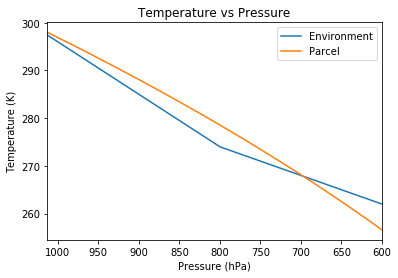

In [7]:
# plot the two graphs
plt.plot(P, Tenv, label = 'Environment')
plt.plot(P, Tp, label = 'Parcel')
plt.xlim([1013,600])
plt.ylabel('Temperature (K)')
plt.xlabel('Pressure (hPa)')
plt.title('Temperature vs Pressure')
plt.legend()

In [24]:
from scipy import integrate
#Calculate Area by trapz intergration
# create a new range of pressure for CIN
new_P = np.arange(700,1013,1)

new_Env = Tenv_function(new_P)
new_Tp = T0*(new_P/P0)**(2/7) 

Env_int = integrate.cumtrapz(new_Env, new_P)
Tp_int = integrate.cumtrapz(new_Tp, new_P)

CIN = Tp_int[-1] - Env_int[-1]
CIN

847.6057963663334

c)
From plot <br>
LFC is around 700 hPa or below absolute zero <br>
LNB is not seen on this graph.  <br>
CIN = area between the two curves from 700 < P < 1013 <br>

Part d)

In [9]:
Pd = np.arange(350,1013,1)

def part_d1(P):
    if P > 970:
        return  338.5 - 0.04*(P)
    if (P <= 970 and P> 700):
        return 163.94 + 0.14*(P)
    else:
        return 198.94 + 0.09*(P)
    
def part_d2 (P):
    new_list = []
    for i in np.arange(0,len(P),1):
        new_list.append(part_d1(P[i]))
    return new_list

Tp2 = T0*(Pd/P0)**(2/7) 
len(part_d2(Pd))
len(Pd)

663

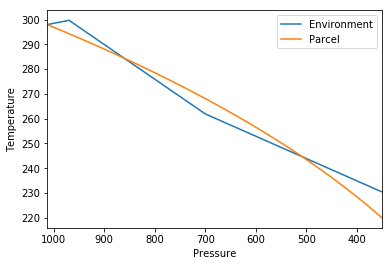

In [10]:
plt.plot(Pd,part_d2(Pd),label = 'Environment')
plt.plot(Pd,Tp2, label = 'Parcel')
plt.xlim([1013,350])
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Temperature vs Pressure ')
plt.legend()

integrate to find the values of CIN and CAPE
CIN is area between the two curves from surface to LFC (P = 865.429)

CAPE is area between the two curves from LFC to LNB (P = 509)

In [23]:
P_CIN = np.arange(865.5,1013,1)
Tp_CIN = T0*(P_CIN/P0)**(2/7) 

CIN_EN = integrate.cumtrapz(part_d2(P_CIN), P_CIN)
CIN_Tp = integrate.cumtrapz(Tp_CIN, P_CIN)

CIN_AREA = CIN_EN[-1] - CIN_Tp[-1]

P_CAPE = np.arange(509,865.5,1)
Tp_CAPE = T0*(P_CAPE/P0)**(2/7) 

CAPE_EN = integrate.cumtrapz(part_d2(P_CAPE), P_CAPE)
CAPE_Tp = integrate.cumtrapz(Tp_CAPE, P_CAPE)

CAPE_AREA = CAPE_Tp[-1] - CAPE_EN[-1]

print(CIN_AREA, CAPE_AREA)


401.66154645878123 1211.645124379589


Area of CIN = 401 J
Area of CAPE = 1211 J

Part e)

In [13]:
# for part c)
np.sqrt(2*CIN)

41.172947340853156

In [26]:
# for part d)
np.sqrt(2*CIN_AREA)
print (np.sqrt(2*CIN_AREA),np.sqrt(2*CAPE_AREA))

28.34295490801131 49.226926054337156
